In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np



In [3]:
df=pd.read_csv("binary_classification_ds.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 104 entries, id to target
dtypes: float64(102), int64(2)
memory usage: 39.7 MB


In [5]:
df.head()

,id,col_24,col_263,col_264,col_214,col_39,col_280,col_140,col_328,col_309,...,col_217,col_262,col_53,col_17,col_259,col_247,col_287,col_990,col_991,target
0,484858,0.998527,0.0,0.0,0.0,0.250000,0.0,0.011236,0.0,0.0,...,0.0,0.0,0.0625,0.153846,0.0,0.0,0.0,16.0,-1.0,0
1,241714,0.999966,0.0,0.0,0.0,0.191176,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0625,0.076923,0.0,0.0,1.0,12.0,-1.0,0
2,198733,0.998017,0.0,1.0,0.0,0.176471,0.0,0.112360,0.0,0.0,...,0.0,0.0,0.1875,0.230769,0.0,0.0,0.0,11.0,-1.0,0
3,106045,0.000000,0.0,0.0,0.0,0.102941,0.0,0.022472,0.0,0.0,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,6.0,-1.0,0
4,28242,0.997506,0.0,0.0,0.0,0.058824,0.0,0.011236,0.0,0.0,...,0.0,0.0,0.0625,0.153846,0.0,0.0,0.0,3.0,-1.0,0


In [6]:
def missing_values(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    return missing_percentage[missing_percentage > 0].sort_values(ascending=False)

missing_values = missing_values(df)
missing_values

Series([], dtype: float64)

In [7]:
missing_values # There are no missing values

Series([], dtype: float64)

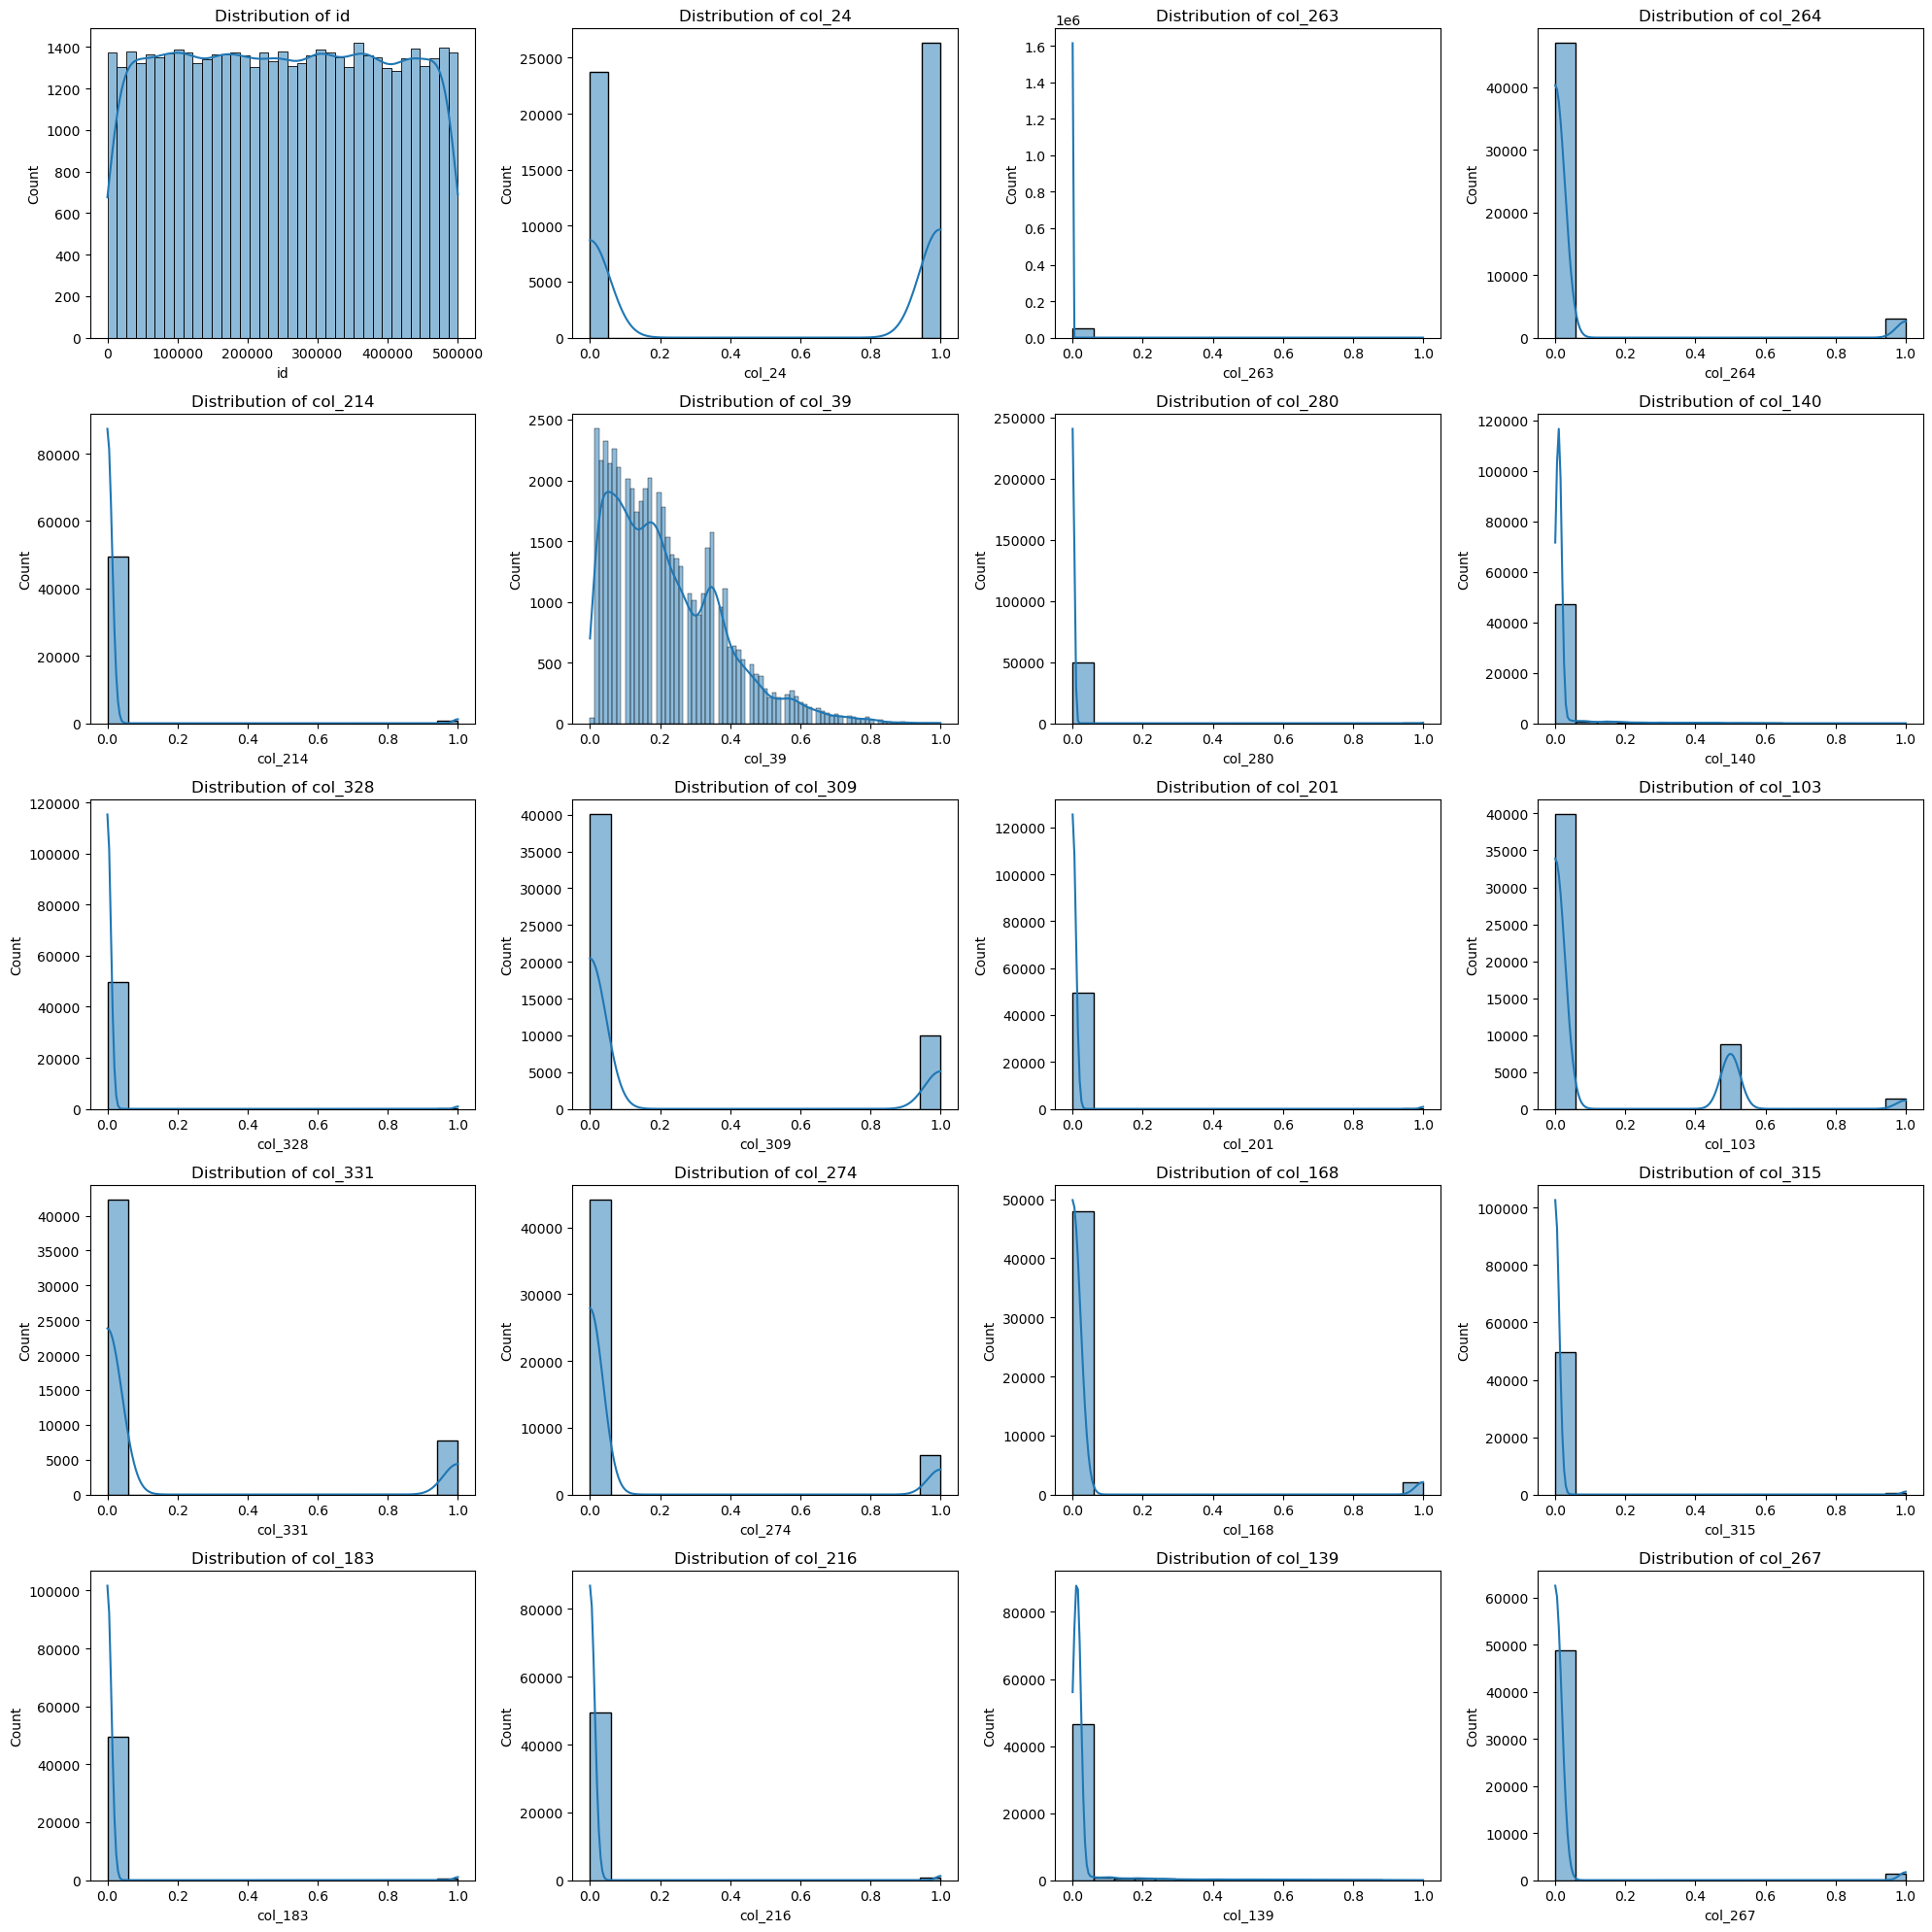

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot distribution
for i, col in enumerate(num_cols[:20]):  
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Outcome : 
•	col_267, col_280, col_328 are sparse, with most values at 0.0 and occasional non-zero values.
•	Most of The columns dominated by 0, such as col_263, col 264, which shows these 2 are highly imbalanced.
•	col_991 contains negative values -1.0, which might indicate missing data or special encodings.
•	The target column is binary from the sample data, most entries are 0, suggesting class imbalance.
•	And there are many more, we need to check each and every variable’s distribution and reduce those if needed
 I am going to use smote technique for balance the responder


In [32]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=["id", "target"])
y = df["target"]

smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="target")], axis=1)

In [33]:
#df_resampled.to_csv("resampled_data.csv", index=False)

In [34]:
df_resampled['target'].value_counts()

0    48347
1    14504
Name: target, dtype: int64

Although SMOTE is not a good practice i just tried to showcased it beacuse the data was highly imbalanced, Usually we don't follw this in our industry

Run a vif algo to find the autocorelated variables and remove them

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_resampled.columns
# vif_data["VIF"] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]

# threshold = 10.0
# while vif_data["VIF"].max() > threshold:
#     drop_feature = vif_data.sort_values("VIF", ascending=False).iloc[0]["Feature"]
#     X_resampled = X_resampled.drop(columns=[drop_feature])
#     vif_data = pd.DataFrame()
#     vif_data["Feature"] = X_resampled.columns
#     vif_data["VIF"] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]

# df_cleaned = pd.concat([pd.DataFrame(X_resampled, columns=X_resampled.columns), pd.Series(y_resampled, name="target")], axis=1)

While running vif I have faced loading issue Server was too light for this heavy processing so we continues to building our model, just for clarification we can use vif to delete the autocorelated feature

Now Lets Build a Beta Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42, penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.7668
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      9638
           1       0.50      0.10      0.16      2933

    accuracy                           0.77     12571
   macro avg       0.64      0.53      0.51     12571
weighted avg       0.71      0.77      0.70     12571



ALthough Accuracy isn't suggesting anything about overfit but we have to reduce the dimension here and retrain the model.

In [42]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
try:
    logit_model = sm.Logit(y_train, X_train_const)
    result = logit_model.fit()
    wald_pvalues = result.pvalues
    
    # Identify the best predictor based on the lowest p-value
    best_predictor = wald_pvalues.idxmin()
    print(f"Best predictor based on Wald Chi-Square test: {best_predictor}")
except np.linalg.LinAlgError:
    print("Singular matrix error encountered during Wald Chi-Square test. Try reducing collinearity.")

         Current function value: 0.481150
         Iterations: 35
Singular matrix error encountered during Wald Chi-Square test. Try reducing collinearity.


Since i couldn't able to perform vif, due to server issue, here i am getting singular matrix error, so now i am going proceed with the iv value technique to reduce dimention

In [44]:
def calculate_iv(X, y):
    iv_dict = {}
    for col in X.columns:
        df_temp = pd.DataFrame({col: X[col], 'target': y})
        df_binned = pd.qcut(df_temp[col], q=10, duplicates='drop')
        grouped = df_temp.groupby(df_binned)['target'].agg(['count', 'sum'])
        grouped['non_event'] = grouped['count'] - grouped['sum']
        grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
        grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
        grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
        grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']
        iv_dict[col] = grouped['iv'].sum()
    return iv_dict

iv_values = calculate_iv(pd.DataFrame(X_resampled, columns=X_resampled.columns), y_resampled)
#print("Information Value (IV) for each variable:")
#print(pd.DataFrame.from_dict(iv_values, orient='index', columns=['IV']).sort_values(by='IV', ascending=False))

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
#print(pd.DataFrame.from_dict(iv_values, orient='index', columns=['IV']).sort_values(by='IV', ascending=False))

In [46]:
iv_values = calculate_iv(pd.DataFrame(X_resampled, columns=X_resampled.columns), y_resampled)
iv_df = pd.DataFrame.from_dict(iv_values, orient='index', columns=['IV']).sort_values(by='IV', ascending=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
#iv_df

Now Remove the Features which iv value less than 0.1 and more than 0.5

In [48]:
iv_df_filtered = iv_df[(iv_df['IV'] >= 0.1) & (iv_df['IV'] <= 0.5)]
X_resampled = X_resampled[iv_df_filtered.index]

In [65]:
iv_df_filtered

,IV
col_110,0.498141
col_118,0.479125
col_119,0.460986
col_53,0.351704
col_17,0.298732
col_25,0.249346
col_114,0.214510
col_148,0.204789
col_137,0.204684
col_24,0.204439


Here is our 17 final Variables are ready to train the model

In [50]:
df_cleaned = pd.concat([pd.DataFrame(X_resampled, columns=X_resampled.columns), pd.Series(y_resampled, name="target")], axis=1)

In [51]:
df_cleaned.shape

(62851, 17)

In [52]:
X = df_cleaned.drop(columns=["target"], errors='ignore')  # Exclude target column
y = df_cleaned["target"]

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Now let's do the hyperparameter tuning for finding the best best model fit

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

param_grid = {
    'LogisticRegression': {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best {model_name} Model: {grid_search.best_params_}, Accuracy: {grid_search.best_score_:.4f}")

Best LogisticRegression Model: {'C': 0.1, 'penalty': 'l2'}, Accuracy: 0.7671
Best RandomForest Model: {'max_depth': 20, 'n_estimators': 50}, Accuracy: 0.9654

The best logistic regression model was found using L2 regularization with a regularization strength of 0.1, achieving an accuracy of 76.71% but in the random forest 50 decision trees and a maximum depth of 20, achieving an accuracy of 96.54%

In [56]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_log_prob = log_reg.predict_proba(X_test)[:, 1]
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7668
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      9638
           1       0.50      0.10      0.16      2933

    accuracy                           0.77     12571
   macro avg       0.64      0.53      0.51     12571
weighted avg       0.71      0.77      0.70     12571



In [57]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9702
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      9638
           1       1.00      0.87      0.93      2933

    accuracy                           0.97     12571
   macro avg       0.98      0.94      0.96     12571
weighted avg       0.97      0.97      0.97     12571



In [58]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [59]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

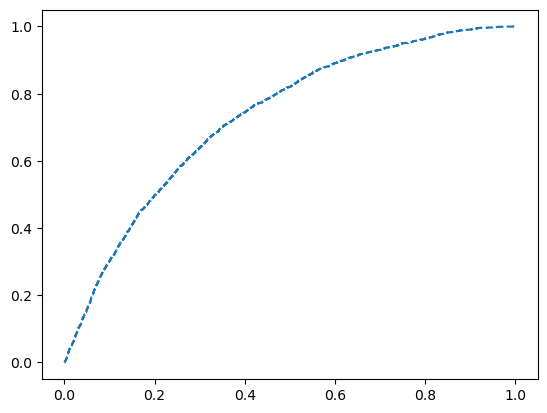

In [60]:
# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log_prob)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', linestyle='--')

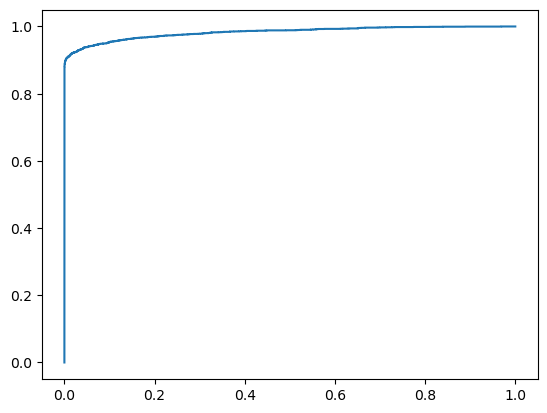

In [61]:
# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


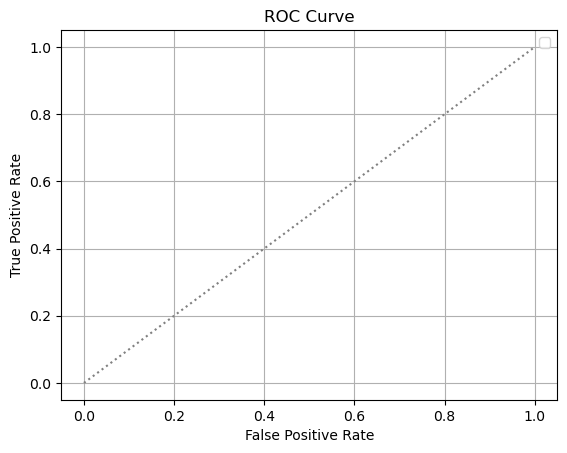

In [62]:
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

By looking at the AUC, we can say that here Logistic Regression performed better cause most of the areas consized of 0.5 which is ideal, while the Random forest model shows us that it is overfitted

Now Let's do a KS Statistics to check the discrimantory power

In [66]:
selected_features = [
    "col_110", "col_118", "col_119", "col_53", "col_17", "col_25", "col_114", 
    "col_148", "col_137", "col_24", "col_133", "col_139", "col_140", "col_9", "col_52", "col_86"
]

In [67]:
X = df_cleaned[selected_features]
y = df_cleaned.iloc[:, -1] 

In [68]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#y_pred_rf_prob
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_prob)

In [70]:
ks_statistic = max(tpr - fpr)

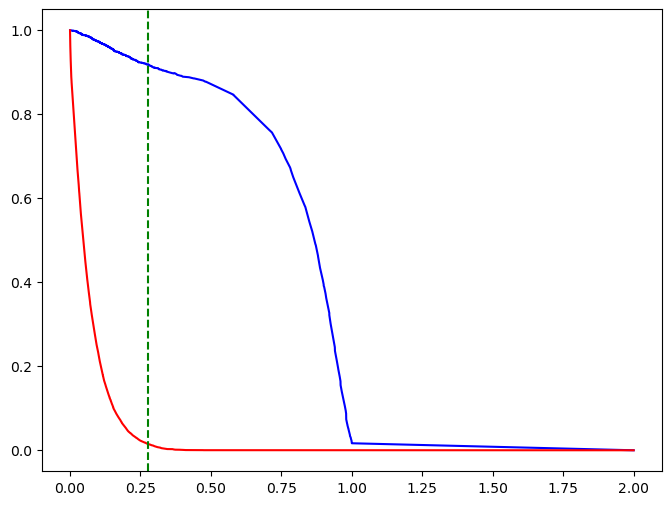

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label="True Positive Rate (TPR)", color="blue")
plt.plot(thresholds, fpr, label="False Positive Rate (FPR)", color="red")
plt.axvline(thresholds[np.argmax(tpr - fpr)], color='green', linestyle='--', label=f"KS = {ks_statistic:.4f}")
